In [1]:
# !mkdir src
# %cd src

In [2]:
%%writefile card.py

import enum
import functools
from typing import Iterable


class Color(enum.Enum):
    Black = 0
    Red = 1

# Rank/Value
class Rank(enum.Enum):
    Ace = 14
    King = 13
    Queen = 12
    Jack = 11
    No10 = 10
    No9 = 9
    No8 = 8
    No7 = 7
    No6 = 6
    No5 = 5
    No4 = 4
    No3 = 3
    No2 = 2

class Suit(enum.Enum):
    Hearts = 0
    Diamonds = 1
    Clubs = 2
    Spades = 3

@functools.total_ordering
class Card:
    def __init__(self, suit: Suit, rank: Rank):
        self.suit = suit
        self.rank = rank
        if suit == Suit.Hearts or suit == Suit.Diamonds:
            self.color = Color.Red
        else:
            self.color = Color.Black
    
    def __str__(self) -> str:
        return f"{{ suit: {self.suit.name}, color: {self.color.name}, rank: {self.rank.name} }}"

    def __lt__(self, other):
        return self.rank.value < other.rank.value

    def __eq__(self, other):
        return self.rank.value == other.rank.value


Writing card.py


In [3]:
%%writefile deck.py


import random
from typing import Iterable

from card import Card, Suit, Rank

class Deck:
    def __init__(self, cards: list[Card]):
        '''assuming the card faces are downwards, and the last card is on the top of the deck'''
        self.__cards = cards

    @classmethod
    def new(cls):
        cards = []
        for suit in Suit:
            for rank in Rank:
                card = Card(suit, rank)
                cards.append(card)
        return cls(cards)
    
    def __str__(self) -> str:
        string = "[ \n"
        for card in self.__cards:
            string += f"    {card} \n"
        string += "]"
        return string

    def split(self, number: int):
        '''returns an iterable of Deck with first deck with possibly more cards than the ones that follow it'''
        total = len(self.__cards)
        num = total//number
        cards = self.__cards
        yield Deck(cards[ : num + total - num*number])
        cards = cards[num + total - num*number : ]
        for _ in range(number-1):
            yield Deck(cards[:num])
            cards = cards[num:]

    def shuffle(self):
        random.shuffle(self.__cards)

    def add_to_bottom(self, cards: Iterable[Card]):
        cards = list(cards)
        cards.extend(self.__cards)
        self.__cards = cards
    
    def add_to_top(self, cards: Iterable[Card]):
        for card in cards:
            self.__cards.append(card)

    def pop(self) -> Card | None:
        if len(self.__cards) > 0:
            return self.__cards.pop()
        else:
            return None
    
    def is_empty(self):
        return len(self.__cards) == 0
    
    def num_cards(self):
        return len(self.__cards)

Writing deck.py


In [4]:
%%writefile game.py


import random

from deck import Deck

def simulate_game() -> (Deck, Deck, Deck, int):
    full_deck = Deck.new()
    full_deck.shuffle()
    player1, player2 = full_deck.split(2)

    turns = 0
    while (not player1.is_empty()) and (not player2.is_empty()):
        turns += 1

        card1 = player1.pop()
        card2 = player2.pop()
        cards = [card1, card2]

        # problem statement does not provide any ordering for
        # the cards, so randomising it
        random.shuffle(cards)

        if card1 > card2:
            player1.add_to_bottom(cards)
        elif card2 > card1:
            player2.add_to_bottom(cards)
    
    return full_deck, player1, player2, turns

def gather_data(n = 1000):
    turn_freqs = {}
    num_cards_left_freq = {}

    for _ in range(n):
        _, p1, p2, turns = simulate_game()
        turn_freqs.setdefault(turns, 0)
        turn_freqs[turns] += 1
        
        num_cards = p1.num_cards() + p2.num_cards()
        num_cards_left_freq.setdefault(num_cards, 0)
        num_cards_left_freq[num_cards] += 1

    return turn_freqs, num_cards_left_freq


Writing game.py


In [5]:
%%writefile main.py


from game import *

def run_game_once():
    _, player1, player2, turns = simulate_game()

    if player1.is_empty() and player2.is_empty():
        print("the game ended in a Tie")
    elif player1.is_empty():
        print("Player 2 wins")
    else:
        print("Player 1 wins")
    
    print(f"game lasted {turns} turns")
    # print(player1)
    # print(player2)


Writing main.py


In [6]:
from card import *
from deck import *
import game
import main

In [7]:
main.run_game_once()

Player 2 wins
game lasted 242 turns


In [8]:
_, p1, p2, _ = game.simulate_game()
print(p1, p2)

[ 
    { suit: Diamonds, color: Red, rank: No7 } 
    { suit: Hearts, color: Red, rank: No2 } 
    { suit: Diamonds, color: Red, rank: No8 } 
    { suit: Diamonds, color: Red, rank: No2 } 
    { suit: Spades, color: Black, rank: Jack } 
    { suit: Diamonds, color: Red, rank: King } 
    { suit: Clubs, color: Black, rank: Queen } 
    { suit: Hearts, color: Red, rank: No9 } 
    { suit: Diamonds, color: Red, rank: No10 } 
    { suit: Diamonds, color: Red, rank: No6 } 
    { suit: Diamonds, color: Red, rank: Queen } 
    { suit: Spades, color: Black, rank: No5 } 
    { suit: Hearts, color: Red, rank: King } 
    { suit: Spades, color: Black, rank: No3 } 
    { suit: Spades, color: Black, rank: No8 } 
    { suit: Hearts, color: Red, rank: No4 } 
    { suit: Spades, color: Black, rank: No4 } 
    { suit: Clubs, color: Black, rank: No6 } 
    { suit: Clubs, color: Black, rank: No5 } 
    { suit: Clubs, color: Black, rank: No8 } 
    { suit: Clubs, color: Black, rank: No7 } 
    { suit: Dia

In [9]:
turn_freqs, num_cards_left_freq = game.gather_data(10000)

In [10]:
import matplotlib.pyplot as plt

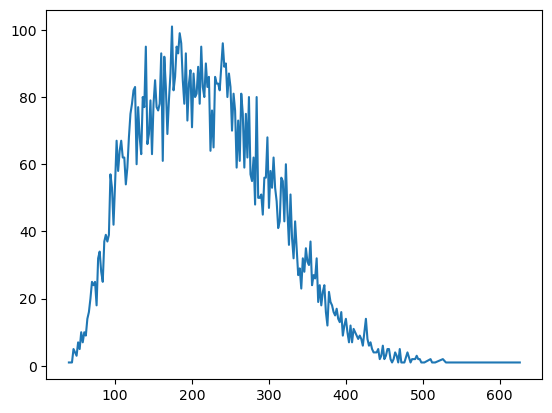

In [11]:
turn_freqs_sorted = sorted(turn_freqs.items(), key=lambda x: x[0])
x = list(map(lambda x: x[0], turn_freqs_sorted))
y = list(map(lambda x: x[1], turn_freqs_sorted))
plt.plot(x, y)
plt.show()

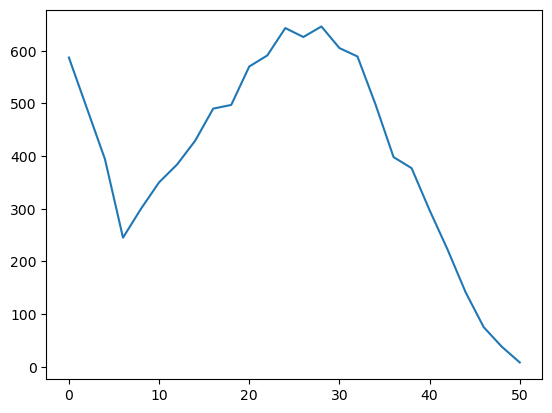

In [12]:
num_cards_left_freq_sorted = sorted(num_cards_left_freq.items(), key=lambda x: x[0])
x = list(map(lambda x: x[0], num_cards_left_freq_sorted))
y = list(map(lambda x: x[1], num_cards_left_freq_sorted))
plt.plot(x, y)
plt.show()